In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

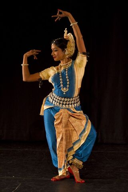

In [3]:
im = PILImage.create('examples/odissi.jpg')
im.thumbnail((192,192))
im

In [5]:
#|export
learn = load_learner('model/indian_dance_forms_resnet50.pkl')

In [6]:
learn.predict(im)

/home/tan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


('odissi',
 tensor(6),
 tensor([2.6438e-02, 1.9373e-03, 3.6551e-04, 4.9653e-04, 1.1909e-04, 1.1666e-02,
         9.5897e-01, 1.0382e-05]))

In [7]:
#|export
categories = learn.dls.vocab

def classify_dance(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify_dance(im)

{'bharatanatyam': 0.02643846906721592,
 'kathak': 0.0019372508395463228,
 'kathakali': 0.0003655065956991166,
 'kuchipudi': 0.0004965317784808576,
 'manipuri': 0.00011908661690540612,
 'mohiniyattam': 0.011665571480989456,
 'odissi': 0.9589672088623047,
 'sattriya': 1.0382239452155773e-05}

In [9]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['examples/odissi.jpg',
            'examples/bharatanatyam.jpg',
            'examples/kathakali.jpg']
intf = gr.Interface(fn=classify_dance, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/tan/.local/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/tan/.local/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/tan/.local/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/tan/.local/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [9]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')